___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 9. Basic of neural network

## Lab work 9



#### Мета: 

* розібратися із роботою нейронних мереж та їх реалізації в TensorFlow

### Завдання 1:

Завантажте данні з https://www.kaggle.com/competitions/dogs-vs-cats/data

навчіть нейромережу відрізняти собаку від кота

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
(train_dataset, test_dataset),info = tfds.load(name='cats_vs_dogs',
                                      split=['train[:70%]', 'train[70%:]'],
                                      with_info = True,
                                      as_supervised=True)



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete8C23LB/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [3]:
info.description

'A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.'

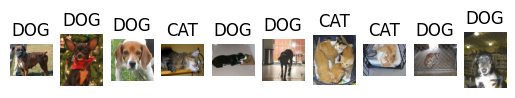

In [4]:
animal = ['CAT', 'DOG']
i = 0
fig, ax = plt.subplots(1, 10)
for image, label in train_dataset.take(10):
    ax[i].axis('off')
    ax[i].set_title(animal[label])
    ax[i].imshow(image)
    i += 1

plt.show()

In [6]:
def format_image(image, label):
  image = tf.image.resize(image, (img_size, img_size))/255.0
  label = tf.one_hot(label, 2)
  return image,label

num_examples = info.splits['train'].num_examples

batch_size = 16
img_size = 220

train_batches = train_dataset.cache().shuffle(num_examples//4).map(format_image).batch(batch_size).prefetch(1)
validation_batches = test_dataset.map(format_image).batch(batch_size).prefetch(1)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1,  activation='softmax')
])


model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 128)      0

In [ ]:
history = model.fit(train_batches,
                    epochs = 3,
                    validation_data = validation_batches)

Epoch 1/3
1018/1018 [==============================] - 1912s 2s/step - loss: 0.7187 - accuracy: 0.5485 - val_loss: 0.6531 - val_accuracy: 0.6128
Epoch 2/3
1018/1018 [==============================] - 1880s 2s/step - loss: 0.5950 - accuracy: 0.6834 - val_loss: 0.5432 - val_accuracy: 0.7256
Epoch 3/3
1018/1018 [==============================] - 1805s 2s/step - loss: 0.4650 - accuracy: 0.7842 - val_loss: 0.4875 - val_accuracy: 0.7620


In [9]:
def format_image_2(image, label):
  image = tf.image.resize(image, (img_size, img_size))/255.0
  label = tf.one_hot(label, 10)
  return image,label

# num_examples = info.splits['train'].num_examples

batch_size_2 = 32

train_batches_2 = train_dataset.map(format_image_2).batch(batch_size_2).prefetch(1)
validation_batches_2 = test_dataset.map(format_image_2).batch(batch_size_2).prefetch(1)

In [10]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10,  activation='softmax')
])


model2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 128)     

In [12]:
history = model2.fit(train_batches_2,
                    epochs = 6,
                    validation_data = validation_batches_2)

Epoch 1/6
509/509 [==============================] - 2679s 5s/step - loss: 0.6603 - accuracy: 0.6491 - val_loss: 0.5811 - val_accuracy: 0.6954
Epoch 2/6
509/509 [==============================] - 2587s 5s/step - loss: 0.5017 - accuracy: 0.7556 - val_loss: 0.5283 - val_accuracy: 0.7428
Epoch 3/6
509/509 [==============================] - 2675s 5s/step - loss: 0.4180 - accuracy: 0.8066 - val_loss: 0.5207 - val_accuracy: 0.7477
Epoch 4/6
509/509 [==============================] - 2623s 5s/step - loss: 0.3327 - accuracy: 0.8533 - val_loss: 0.5861 - val_accuracy: 0.7485
Epoch 5/6
509/509 [==============================] - 2626s 5s/step - loss: 0.2357 - accuracy: 0.9024 - val_loss: 0.7047 - val_accuracy: 0.7435
Epoch 6/6
509/509 [==============================] - 2558s 5s/step - loss: 0.1829 - accuracy: 0.9280 - val_loss: 0.8497 - val_accuracy: 0.7146
